# Alyssa McCormick - Pima Indians Diabetes Data Set
#### CSCI 334: Data Mining - Final Project

The Pima Indians Diabetes dataset is a widely used dataset in machine learning for classification problems. It contains medical data of Pima Indian women, including attributes like glucose levels, blood pressure, BMI, age, and also a binary label indicating whether they have diabetes or not. The goal of this project is to build classifiers that can predict whether a patient has diabetes or not based on the attributes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

<div class="alert alert-block alert-success" size = 10>
    <b><font size ='6'>Data Exploration</font></b> 
</div> 

<div class="alert alert-block alert-info">
    <font color='black' size=5 >Basic Information</font>
</div> 

In [3]:
# load pima indians diabetes dataset
pima = pd.read_csv('diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# get shape of X - removing outcome column
X = pima.drop('Outcome', axis=1).values
shape = X.shape
print("Shape of X: ", shape)

Shape of X:  (768, 8)


In [5]:
# get # of dimensions
ndim = X.ndim
print("Number of dimensions: ", ndim)

Number of dimensions:  2


In [6]:
# get feature names
features = pima.columns
print("\033[1m" + "Features:" + "\033[0m")
for feature in features:
    print(feature)

Features:
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [7]:
# get target
target = pima['Outcome']
targets = np.unique(target)
print("Targets: ", targets)
print("1 = the person has diabetes \n0 = the person does not have diabetes")

Targets:  [0 1]
1 = the person has diabetes 
0 = the person does not have diabetes


In [8]:
num_features = shape[1]
num_data_points = shape[0]
print("Number of features: ", num_features, "\nNumber of data points: ", num_data_points)

Number of features:  8 
Number of data points:  768


<div class="alert alert-block alert-info">
    <font color='black' size=5 >Basic Statistics</font>
</div> 

In [9]:
# get feature names
feature_names = pima.columns[:-1]

# calculate mean, standard deviation, and variance for each target
for target in targets:
    # get rows for current target
    rows = pima[pima['Outcome'] == target]
    
    # get feature values for target
    values = rows.drop('Outcome', axis=1).values
    
    mean = np.mean(values, axis=0)
    std = np.std(values, axis=0)
    var = np.var(values, axis=0)
    
    # display output
    print(f"\033[1m{target} \033[0m")
    
    # display means
    print("\u0332".join("Mean"))
    for feature, mean_value in zip(feature_names, mean):
        print(f"{feature}: {round(mean_value, 3)}")
    print()
        
    # display standard deviations
    print("\u0332".join("Standard deviation"))
    for feature, std_value in zip(feature_names, std):
        print(f"{feature}: {round(std_value, 3)}")
    print()
    
    # display variance
    print("\u0332".join("Variance"))
    for feature, var_value in zip(feature_names, var):
        print(f"{feature}: {round(var_value, 3)}")
    print()
    print()

0 
M̲e̲a̲n
Pregnancies: 3.298
Glucose: 109.98
BloodPressure: 68.184
SkinThickness: 19.664
Insulin: 68.792
BMI: 30.304
DiabetesPedigreeFunction: 0.43
Age: 31.19

S̲t̲a̲n̲d̲a̲r̲d̲ ̲d̲e̲v̲i̲a̲t̲i̲o̲n
Pregnancies: 3.014
Glucose: 26.115
BloodPressure: 18.045
SkinThickness: 14.875
Insulin: 98.766
BMI: 7.682
DiabetesPedigreeFunction: 0.299
Age: 11.656

V̲a̲r̲i̲a̲n̲c̲e
Pregnancies: 9.085
Glucose: 681.996
BloodPressure: 325.622
SkinThickness: 221.267
Insulin: 9754.797
BMI: 59.016
DiabetesPedigreeFunction: 0.089
Age: 135.862


1 
M̲e̲a̲n
Pregnancies: 4.866
Glucose: 141.257
BloodPressure: 70.825
SkinThickness: 22.164
Insulin: 100.336
BMI: 35.143
DiabetesPedigreeFunction: 0.55
Age: 37.067

S̲t̲a̲n̲d̲a̲r̲d̲ ̲d̲e̲v̲i̲a̲t̲i̲o̲n
Pregnancies: 3.734
Glucose: 31.88
BloodPressure: 21.452
SkinThickness: 17.647
Insulin: 138.43
BMI: 7.249
DiabetesPedigreeFunction: 0.372
Age: 10.948

V̲a̲r̲i̲a̲n̲c̲e
Pregnancies: 13.945
Glucose: 1016.333
BloodPressure: 460.174
SkinThickness: 311.406
Insulin: 19162.902
BMI: 52.

### Histograms
The histograms provide a visual representation of the distribution of each feature. They help undertsand the distribution of each attribute among the subjects, and gives further insight into each individual characteristic.

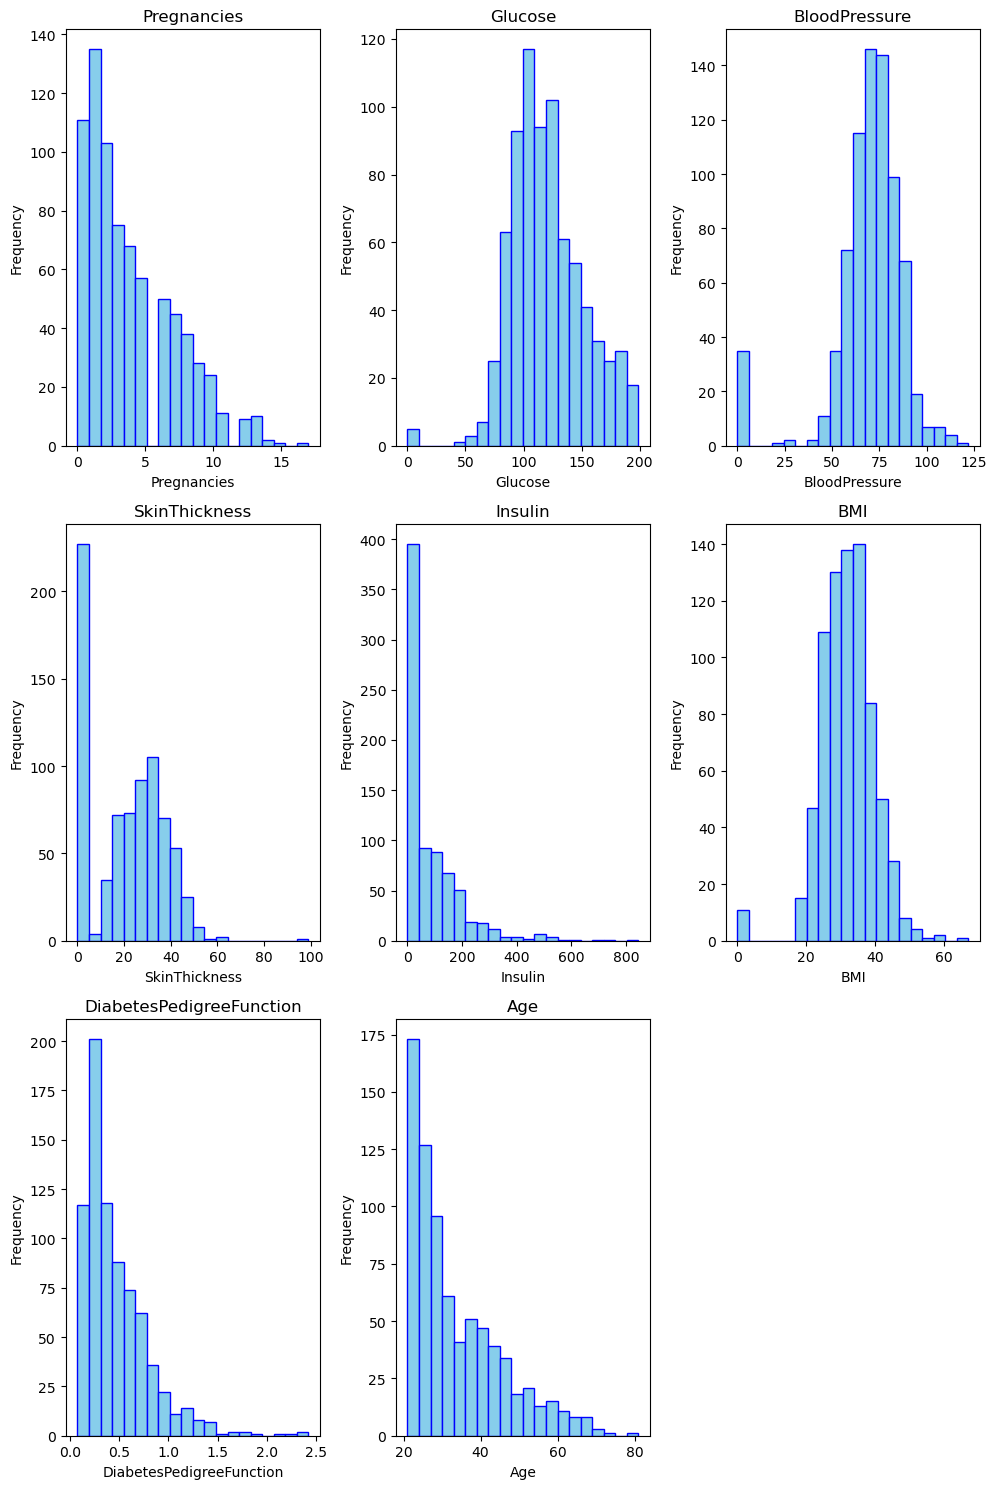

In [10]:
# Plot histogram for each feature
plt.figure(figsize=(10, 15))
for i, col in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.hist(pima[col], bins=20, color='skyblue', edgecolor='blue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

### Correlation Matrix
The correlation matrix helps visualize the relationships between each of the different featrues and how they are correlated. Below we can see that Glucose has the highest correlation to Outcome out of all the attributes and is therefore more likely to be predictive and lead to more accurate results. We can also see that Blood Pressure and Skin Thickness are not closely correlated to Outcome. 

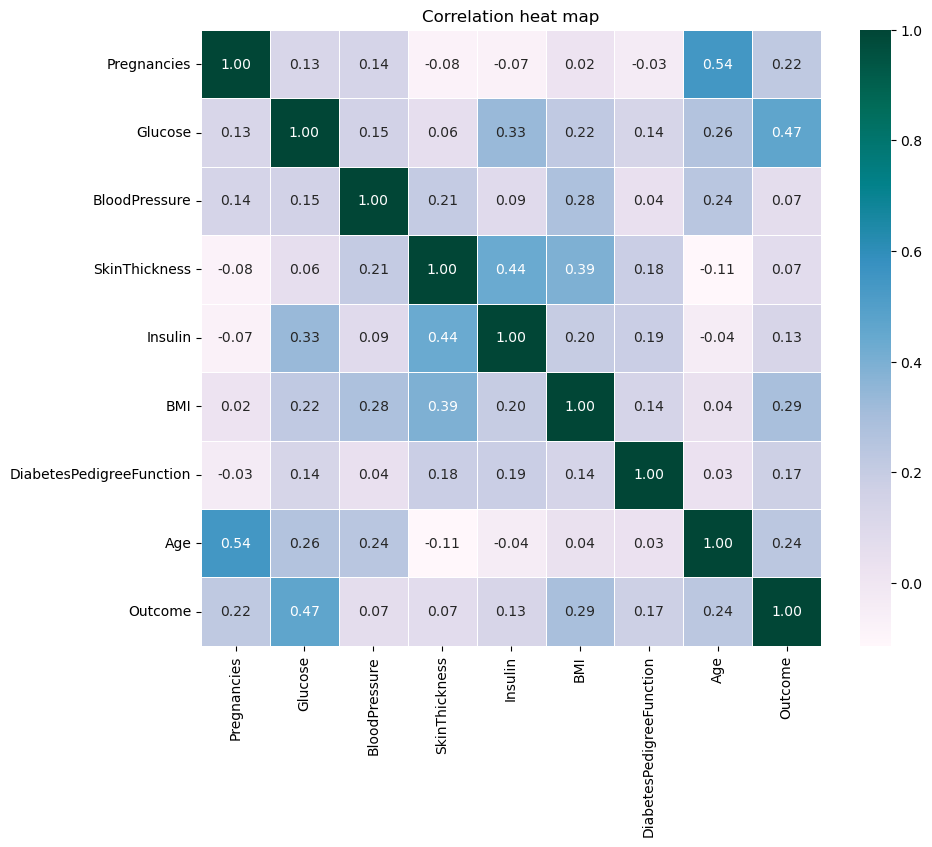

In [19]:
# Correlation matrix heatmap comparing features

# Calculate correlation matrix
pima_corr = pima.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pima_corr, annot=True, cmap='PuBuGn', fmt='.2f', linewidths=0.5)
plt.title('Correlation heat map')
plt.show()

### Gaussian distribution
The Gaussian distributions help us visualize each feature and compare them with both target values. We can determine which features are closer related to which target by comparing the distributions. Each feature is most likely more closely associated with the target distribution that has a larger mean and wider spread.

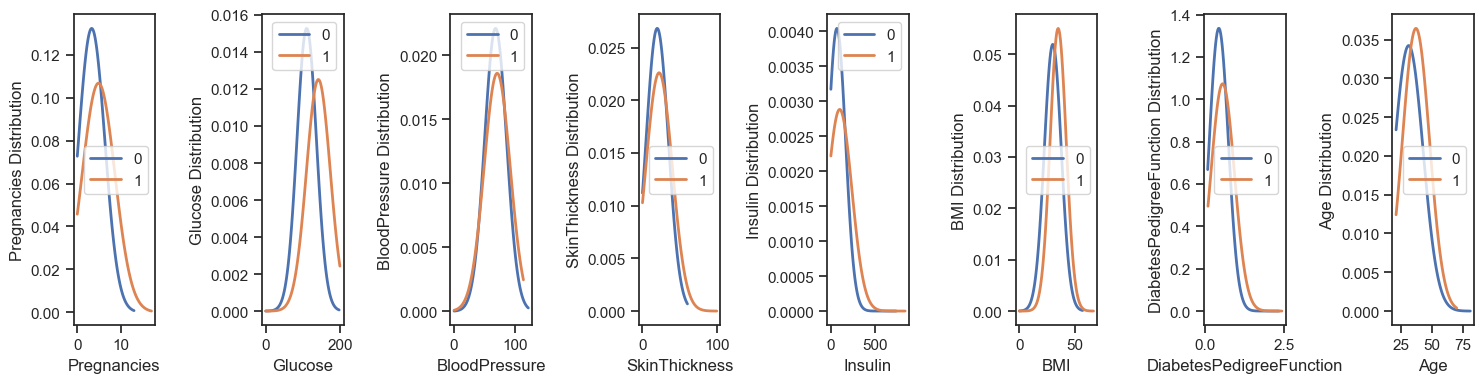

In [173]:
#Gaussian model
gaussian = lambda x,mean, std : 1/(np.sqrt(2*np.pi)*std)*np.exp(-(x-mean)**2/(2*(std**2)))

# create subplots
fig, axs = plt.subplots(1, X.shape[1], figsize=(15, 4))

# get mean and standard deviation
for target in targets:
    # get rows for current target
    rows = pima[pima['Outcome'] == target]
    
    # get feature values for target
    values = rows.drop('Outcome', axis=1).values
    
    mean = np.mean(values, axis=0)
    std = np.std(values, axis=0)
    
    # display plots for each feature
    for i in range(values.shape[1]):
        # get feature values for current target
        feature_values = values[:, i]
        
        # create ndarray for plotting
        x = np.linspace(feature_values.min(), feature_values.max(), 100)
        
        # compute Gaussian model
        y = gaussian(x, mean[i], std[i])
        
        # display subplot
        axs[i].plot(x, y, lw=2, label=target)
        axs[i].set_xlabel(f"{feature_names[i]}")
        axs[i].set_ylabel(f"{feature_names[i]} Distribution")
        axs[i].legend()
               

# show plots
plt.tight_layout()
plt.show()

### Box Plots
Box plots are useful for visualizing the distribution for each feature along with the Gaussian distributions. The box plots allow for a more side-by-side comparison where you can also easily detect outliers, which is important in medical datasets like this to determine anomalies or errors.

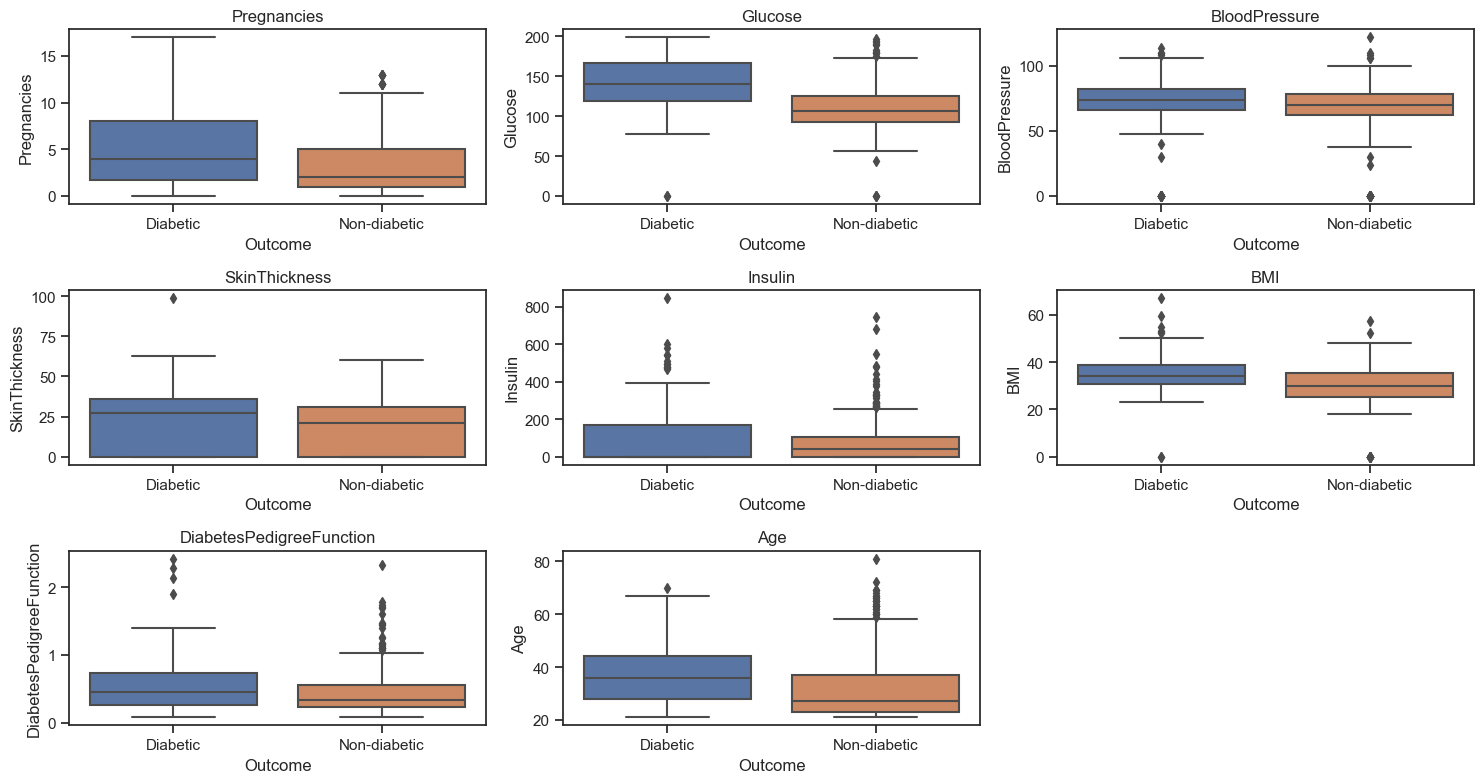

In [174]:
# Plot box plot for each feature against each outcome
sns.set(style='ticks')

# Combine features with outcomes for plotting
pima_plot = pima.copy()
pima_plot['Outcome'] = pima_plot['Outcome'].map({0: 'Non-diabetic', 1: 'Diabetic'})

# Box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=col, data=pima_plot)
    plt.title(col)
    plt.xlabel('Outcome')
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

#

<div class="alert alert-block alert-success" size = 7>
    <b><font size ='6'>Data Preprocessing</font></b> 
</div> 

### Handle missing values

In [175]:
# Check for missing values
missing_values = pima.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


We can see above that the dataset does not contain any missing values and does not necessitate any cleaning.

### Discretization

In [176]:
# Discretize 'Age' feature
pima['Age_bins'] = pd.cut(pima['Age'], bins=3, labels=['Young', 'Middle-aged', 'Old'])
print(pima['Age_bins'])

0      Middle-aged
1            Young
2            Young
3            Young
4            Young
          ...     
763            Old
764          Young
765          Young
766    Middle-aged
767          Young
Name: Age_bins, Length: 768, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Old']


Above we discretized the attribute 'Age' into 3 bins: 'Young', 'Middle-aged', and 'Old'. This may make classification and analysis less complex moving forward.

### Normalization

In [177]:
# Define normalization function
def normalize(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    return (data - min_vals) / (max_vals - min_vals)

# Remove outcome and non-numeric columns
pima_numeric = pima.drop(['Outcome', 'Age_bins'], axis=1)

# Normalize the features
pima_normalized = normalize(pima_numeric)
print(pima_normalized)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

Above we normalized the dataset in order to put each of the features on the same scale to optimize the classification models. Normalization also ensures that there is equal treatment of all the features and no features are dominating the analysis.

### Feature Selection using PCA

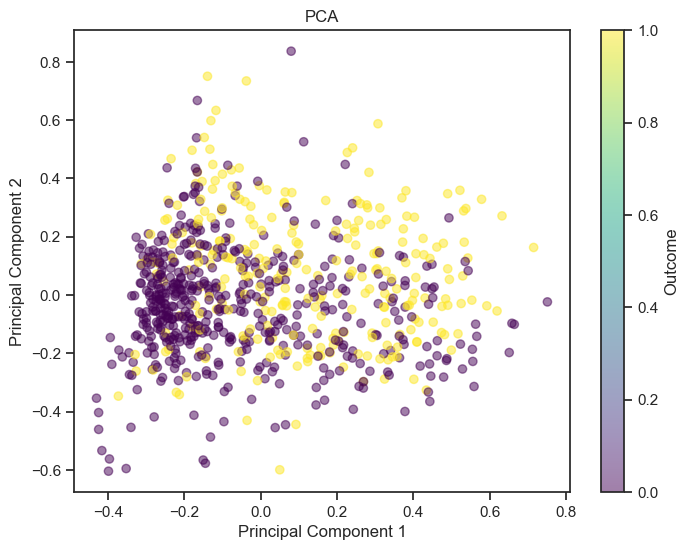

In [178]:
# PCA feature selection
pca = PCA(n_components=2)
pima_pca = pca.fit_transform(pima_normalized)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pima_pca[:, 0], pima_pca[:, 1], c=pima['Outcome'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.colorbar(label='Outcome')
plt.show()

Principal Component Analysis (PCA) helps reduce the dimensionality of the dataset by projecting it onto a lower-dimensional subspace while preserving most of the variance. This is important in a dataset like Pima Indians Diabetes that has so many features. PCA can also improve model performace by reducing noise and redundancy in the data.

<div class="alert alert-block alert-success" size = 7>
    <b><font size ='6'>Classification Models</font></b> 
</div> 

In [179]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, mean_squared_error
from matplotlib.colors import ListedColormap

In [181]:
# Split dataset into features X and target variable y
X = pima_normalized
y = pima['Outcome']

# Split dataset into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-block alert-info">
    <font color='black' size=5 >Logistic Regression</font>
</div>  

In [182]:
# Instantiate logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Fit the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg_model.predict(X_test)

# Evaluate model
correct_preds = (y_pred_log == y_test).sum()
total_samples = len(y_test)
log_reg_accuracy = correct_preds / total_samples
print('Accuracy: ', round(log_reg_accuracy, 5))

print('\nClassification Report:')
print(classification_report(y_test, y_pred_log))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_log))

Accuracy:  0.76623

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154


Confusion Matrix:
[[86 13]
 [23 32]]


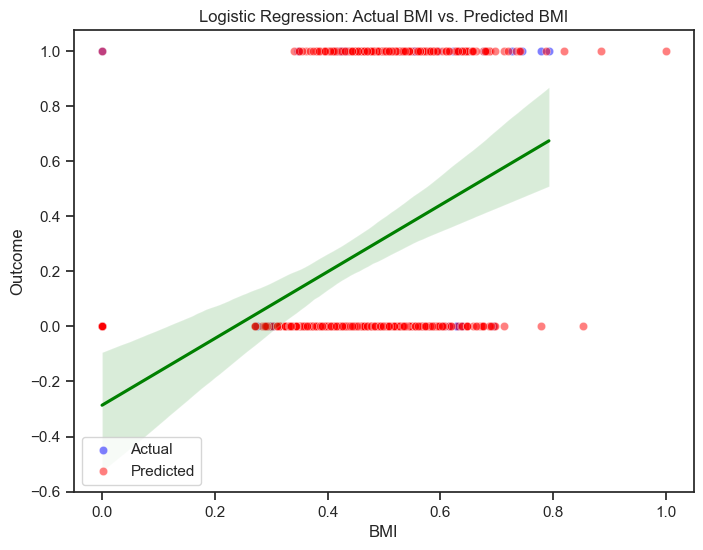

In [183]:
# Visualization of logistic regression model using feature BMI
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x=X_test['BMI'], y=y_test, color='blue', alpha=0.5, label='Actual')
sns.scatterplot(x=X_train['BMI'], y=y_train, color='red', alpha=0.5, label='Predicted')

# Regression line
sns.regplot(x=X_test['BMI'], y=y_pred_log, scatter=False, color='green')

plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.title('Logistic Regression: Actual BMI vs. Predicted BMI')
plt.legend()
plt.show()

Above I used logistic regression as a classification model for the dataset. I instantiated a logistic regression model with a maximum of 1,000 iterations and trained it using the training data. I chose logistic regression because the coefficients can be directly interpreted as the impact of each feature on the probability of the outcome. It is also computationall efficient and can handle a dataset as large as this one with a relatively low cost. I provided a classification report inclusing precision, recall f1-score, and report for both classes. The confusion matrix shows the counts of true positive, false positive, true negative, and false negative. 

I visualized the logistic regression model's performance by using a scatter plot of actual vs. predicted outcomes based on the BMI feature. The plot includes actual test data points in blue, predicted training data points in red, and a green regression line representing the logistic regression model's predictions.

<div class="alert alert-block alert-info">
    <font color='black' size=5 >Decision Tree</font>
</div> 

In [184]:
# Train decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on testing set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
correct_preds = (y_pred_tree == y_test).sum()
total_samples = len(y_test)
tree_accuracy = correct_preds / total_samples
print('Accuracy: ', round(tree_accuracy, 5))

# Display classification report
print('\nClassification report: \n', classification_report(y_test, y_pred_tree))

Accuracy:  0.74675

Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



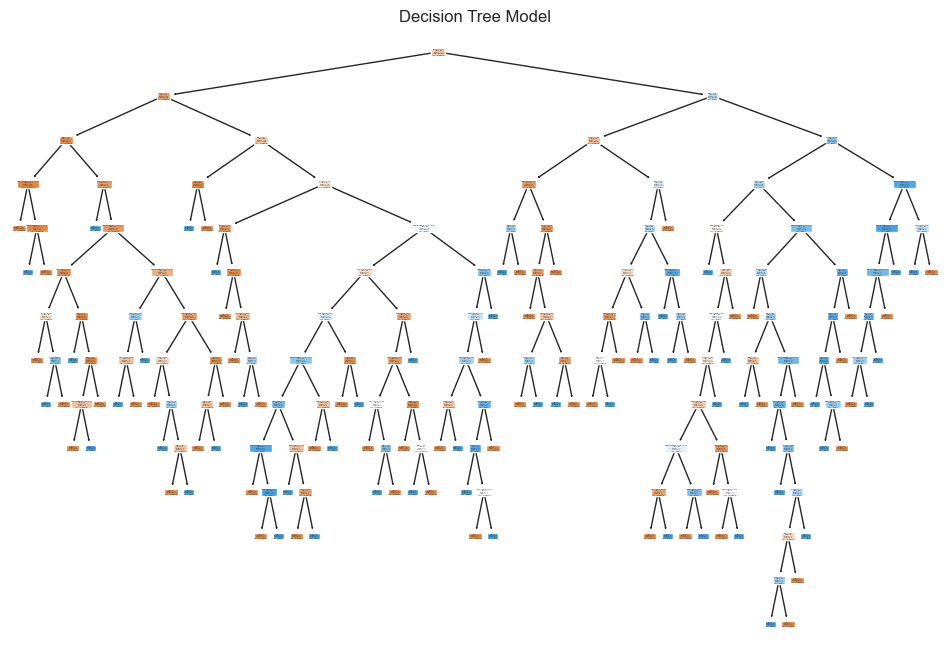

In [185]:
# Visualize decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=feature_names.tolist(), class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title('Decision Tree Model')
plt.show()

Above I used a decision tree as a classification model for the dataset. I instantiated a decision tree classifier with default paramters and trained it using the training data. I chose a decision tree as a model because they are highly interpretable and are valuable for understanding relationships between features and the Outcome. It can also capture non-linear relationships like we have in the Pima Indians Diabetes dataset. I provided a classification report inclusing precision, recall, f1-score, and support for both classes. 

I visualized the decision tree model using a tree diagram. The tree displays the structure of the tree, showing decision nodes and leaf nodes, along with the feature names and class labels. 

<div class="alert alert-block alert-info">
    <font color='black' size=5 >Kernel Methods</font><br/>
    <font color='black' size=3 >SVM with RBF Kernel</font>
</div> 

In [186]:
# Instantiate SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
correct_preds = (y_pred_svm == y_test).sum()
total_samples = len(y_test)
svm_accuracy = correct_preds / total_samples
print('Accuracy: ', round(svm_accuracy, 5))

# Display classification report
print('\nClassification report: \n', classification_report(y_test, y_pred_svm))

Accuracy:  0.74675

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        99
           1       0.66      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



Above I used a Support Vector Machine (SVM) with a Radial Basis Function (RBF) kernel as a classification model for the dataset. I instantiated SVM with RBF kernel and trained it using the training data. I chose this model because it can handle non-linear decision boundaries effectively, working well with the Pima Indians Diabetes dataset. I provided a classification report inclusing precision, recall, f1-score, and support for both classes.

<div class="alert alert-block alert-success" size = 7>
    <b><font size ='6'>Evaluate</font></b> 
</div> 

<div class="alert alert-block alert-info">
    <font color='black' size=5 >5-fold Cross Validation</font>
</div> 

### Accuracy

In [187]:
# Cross-validation based on accuracy

# Logistic Regression
log_reg_scores = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy')
log_reg_mean = log_reg_scores.mean()
print('Logistic Regression Mean Accuracy: ', round(log_reg_mean, 5))

# Decision Tree
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring='accuracy')
tree_mean = tree_scores.mean()
print('Decision Tree Mean Accuracy: ', round(tree_mean, 5))

# SVM with RBF Kernel
svm_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
svm_mean = svm_scores.mean()
print('SVM with RBF Kernel Mean Accuracy: ', round(svm_mean, 5))

# Determine the best model
best_model = max([(log_reg_mean, 'Logistic Regression'), 
                  (tree_mean, 'Decision Tree'), 
                  (svm_mean, 'SVM with RBF Kernel')])

print("\nBest Model:", best_model[1], ': ', round(best_model[0], 5))

Logistic Regression Mean Accuracy:  0.76957
Decision Tree Mean Accuracy:  0.72151
SVM with RBF Kernel Mean Accuracy:  0.77612

Best Model: SVM with RBF Kernel :  0.77612


### Precision

In [188]:
# Cross-validation based on precision

# Define precision scorer
precision_scorer = make_scorer(precision_score, pos_label=1)

# Logistic Regression
log_reg_scores = cross_val_score(log_reg_model, X, y, cv=5, scoring=precision_scorer)
log_reg_mean = log_reg_scores.mean()
print('Logistic Regression Mean Precision: ', round(log_reg_mean, 5))

# Decision Tree
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring=precision_scorer)
tree_mean = tree_scores.mean()
print('Decision Tree Mean Precision: ', round(tree_mean, 5))

# SVM with RBF Kernel
svm_scores = cross_val_score(svm_model, X, y, cv=5, scoring=precision_scorer)
svm_mean = svm_scores.mean()
print('SVM with RBF Kernel Mean Precision: ', round(svm_mean, 5))

# Determine the best model
best_model = max([(log_reg_mean, 'Logistic Regression'), 
                  (tree_mean, 'Decision Tree'), 
                  (svm_mean, 'SVM with RBF Kernel')])

print("\nBest Model:", best_model[1], ': ', round(best_model[0], 5))

Logistic Regression Mean Precision:  0.75233
Decision Tree Mean Precision:  0.61776
SVM with RBF Kernel Mean Precision:  0.73504

Best Model: Logistic Regression :  0.75233


### Recall

In [189]:
# Cross-validation based on recall

# Define recall scorer
recall_scorer = make_scorer(recall_score, pos_label=1)

# Logistic Regression
log_reg_scores = cross_val_score(log_reg_model, X, y, cv=5, scoring=recall_scorer)
log_reg_mean = log_reg_scores.mean()
print('Logistic Regression Mean Recall: ', round(log_reg_mean, 5))

# Decision Tree
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring=recall_scorer)
tree_mean = tree_scores.mean()
print('Decision Tree Mean Recall: ', round(tree_mean, 5))

# SVM with RBF Kernel
svm_scores = cross_val_score(svm_model, X, y, cv=5, scoring=recall_scorer)
svm_mean = svm_scores.mean()
print('SVM with RBF Kernel Mean Recall: ', round(svm_mean, 5))

# Determine the best model
best_model = max([(log_reg_mean, 'Logistic Regression'), 
                  (tree_mean, 'Decision Tree'), 
                  (svm_mean, 'SVM with RBF Kernel')])

print("\nBest Model:", best_model[1], ': ', round(best_model[0], 5))

Logistic Regression Mean Recall:  0.51125
Decision Tree Mean Recall:  0.58225
SVM with RBF Kernel Mean Recall:  0.56744

Best Model: Decision Tree :  0.58225


### F1-score

In [190]:
# Cross-validation based on f1-score

# Define f1-score scorer
f1_scorer = make_scorer(f1_score, pos_label=1)

# Logistic Regression
log_reg_scores = cross_val_score(log_reg_model, X, y, cv=5, scoring=f1_scorer)
log_reg_mean = log_reg_scores.mean()
print('Logistic Regression Mean F1-score: ', round(log_reg_mean, 5))

# Decision Tree
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring=f1_scorer)
tree_mean = tree_scores.mean()
print('Decision Tree Mean F1-score: ', round(tree_mean, 5))

# SVM with RBF Kernel
svm_scores = cross_val_score(svm_model, X, y, cv=5, scoring=f1_scorer)
svm_mean = svm_scores.mean()
print('SVM with RBF Kernel Mean F1-score: ', round(svm_mean, 5))

# Determine the best model
best_model = max([(log_reg_mean, 'Logistic Regression'), 
                  (tree_mean, 'Decision Tree'), 
                  (svm_mean, 'SVM with RBF Kernel')])

print("\nBest Model:", best_model[1], ': ', round(best_model[0], 5))

Logistic Regression Mean F1-score:  0.60777
Decision Tree Mean F1-score:  0.59642
SVM with RBF Kernel Mean F1-score:  0.63867

Best Model: SVM with RBF Kernel :  0.63867


<div class="alert alert-block alert-info">
    <font color='black' size=5 >MSE Cost Function</font>
</div> 

In [191]:
# Get predicted probabilities for each model
y_pred_proba_log = log_reg_model.predict_proba(X_test)[:, 1]
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]
y_pred_decision_svm = svm_model.decision_function(X_test)

# Calculate MSE for each model
mse_log = mean_squared_error(y_test, y_pred_proba_log)
print('MSE for Logistic Regression: ', round(mse_log, 5))

mse_tree = mean_squared_error(y_test, y_pred_proba_tree)
print('MSE for Decision Tree: ', round(mse_tree, 5))

mse_svm = mean_squared_error(y_test, y_pred_decision_svm)
print('MSE for SVM with RBF Kernel: ', round(mse_svm, 5))

# Determine the best model
best_model = min([(mse_log, 'Logistic Regression'), 
                  (mse_tree, 'Decision Tree'), 
                  (mse_svm, 'SVM with RBF Kernel')])

print("\nBest Model:", best_model[1])

MSE for Logistic Regression:  0.167
MSE for Decision Tree:  0.25325
MSE for SVM with RBF Kernel:  1.42941

Best Model: Logistic Regression


<div class="alert alert-block alert-info">
    <font color='black' size=5 >Results</font>
</div> 

When considering model selection for the Pima Indians Diabetes dataset, logistic regression emerges as the optimal choice if the priority is to minimize false positives and maintain high precision. With logistic regression, false positives are minimized, ensuring that individuals who are incorrectly classified as diabetic are kept to a minimum. Moreover, logistic regression has the lowest Mean Squared Error (MSE), suggesting that, on average, its predicted probabilites align closely with the true labels.

On the other hand, if precision is not a primary concern, SVM with an RBF kernel stands out as the preferred model. This model achieves the highest accuracy among the options, indicating strong overall performance in correctly classifying instances. Furthermore, its high F1-score signifies optimal balance between precision and recall, or type I and type II errors. This means that while SVM with RBF kernal may have a slightly higher rate of false positives compared to logistic regression, it excels in capturing true positives without compromising the identification of true negatives, resulting in a more balanced classification performance.